In [14]:
# Reading the world happiness data set
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
import seaborn as sns
import select as something
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
import plotly.express as px
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

World_Happiness = pd.read_csv ('2021.csv')
print(World_Happiness)

World_Happiness.describe()

    Country name  Regional indicator  Ladder score  \
0        Finland      Western Europe         7.842   
1        Denmark      Western Europe         7.620   
2    Switzerland      Western Europe         7.571   
3        Iceland      Western Europe         7.554   
4    Netherlands      Western Europe         7.464   
..           ...                 ...           ...   
144      Lesotho  Sub-Saharan Africa         3.512   
145     Botswana  Sub-Saharan Africa         3.467   
146       Rwanda  Sub-Saharan Africa         3.415   
147     Zimbabwe  Sub-Saharan Africa         3.145   
148  Afghanistan          South Asia         2.523   

     Standard error of ladder score  upperwhisker  lowerwhisker  \
0                             0.032         7.904         7.780   
1                             0.035         7.687         7.552   
2                             0.036         7.643         7.500   
3                             0.059         7.670         7.438   
4               

,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
count,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,1.490000e+02,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000
mean,5.532839,0.058752,5.648007,5.417631,9.432208,0.814745,64.992799,0.791597,-0.015134,0.727450,2.430000e+00,0.977161,0.793315,0.520161,0.498711,0.178047,0.135141,2.430329
std,1.073924,0.022001,1.054330,1.094879,1.158601,0.114889,6.762043,0.113332,0.150657,0.179226,5.347044e-15,0.404740,0.258871,0.213019,0.137888,0.098270,0.114361,0.537645
min,2.523000,0.026000,2.596000,2.449000,6.635000,0.463000,48.478000,0.382000,-0.288000,0.082000,2.430000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.648000
25%,4.852000,0.043000,4.991000,4.706000,8.541000,0.750000,59.802000,0.718000,-0.126000,0.667000,2.430000e+00,0.666000,0.647000,0.357000,0.409000,0.105000,0.060000,2.138000
50%,5.534000,0.054000,5.625000,5.413000,9.569000,0.832000,66.603000,0.804000,-0.036000,0.781000,2.430000e+00,1.025000,0.832000,0.571000,0.514000,0.164000,0.101000,2.509000
75%,6.255000,0.070000,6.344000,6.128000,10.421000,0.905000,69.600000,0.877000,0.079000,0.845000,2.430000e+00,1.323000,0.996000,0.665000,0.603000,0.239000,0.174000,2.794000
max,7.842000,0.173000,7.904000,7.780000,11.647000,0.983000,76.953000,0.970000,0.542000,0.939000,2.430000e+00,1.751000,1.172000,0.897000,0.716000,0.541000,0.547000,3.482000


Text(0, 0.5, 'Ladder Score')

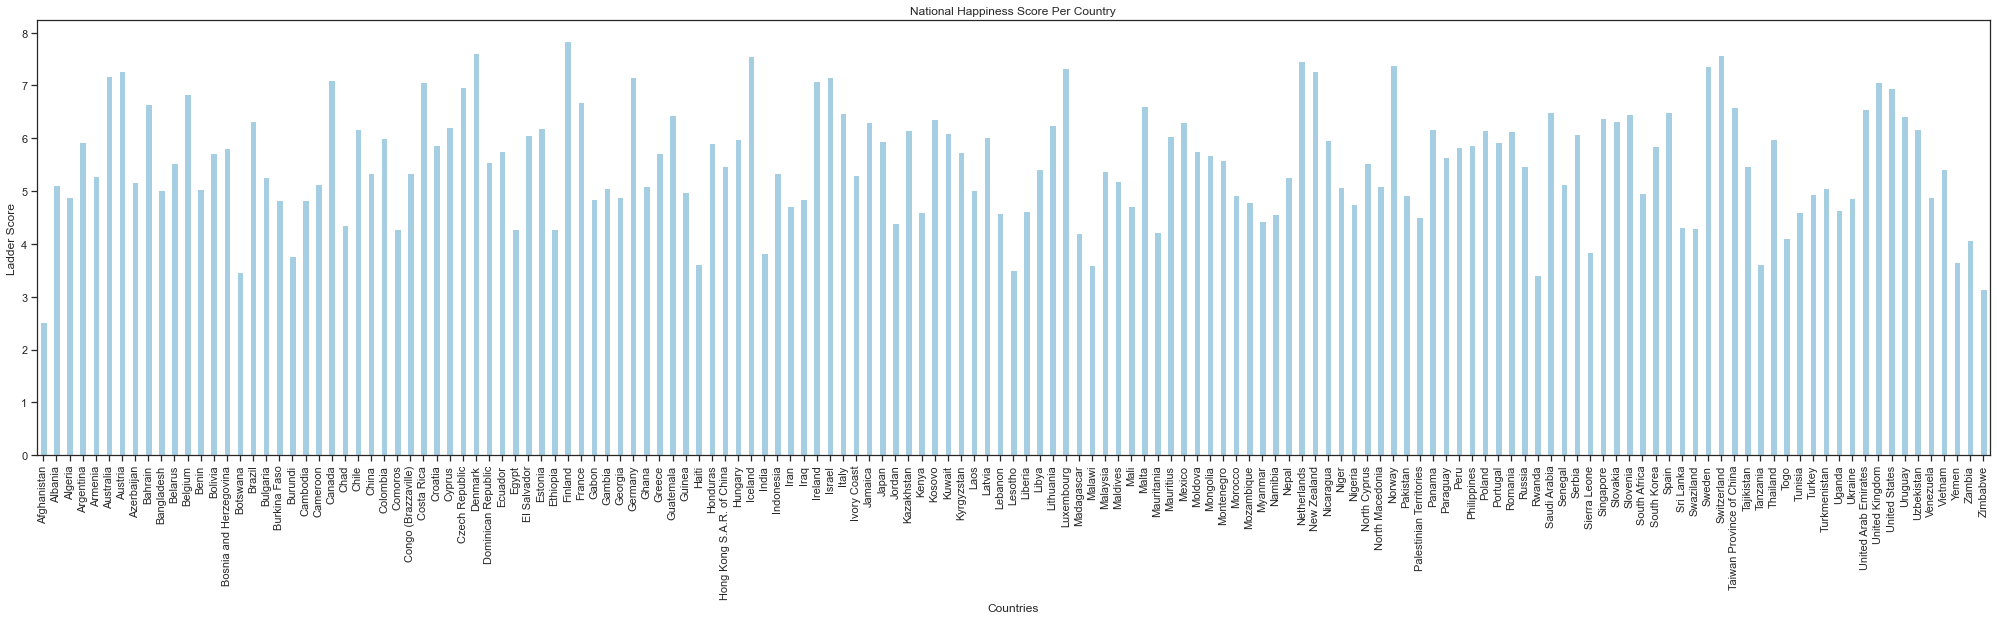

In [15]:
# Summarise the Ladder score per each country and plot it.
WH_ladder_countries = World_Happiness.groupby(by="Country name")['Ladder score'].mean()

ax = WH_ladder_countries.plot.bar(x='Country name', xlabel = '', figsize=(35,8),colormap='Paired')

plt.title("National Happiness Score Per Country")
plt.xlabel("Countries")
plt.ylabel("Ladder Score")



In [16]:
# Importing Geopandas and reading the data
import geopandas as gpd
geo_world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
print(f"{type(geo_world)},{geo_world.geometry.name}")
print(geo_world.head())
print(geo_world.geometry.geom_type.value_counts())


<class 'geopandas.geodataframe.GeoDataFrame'>,geometry
     pop_est      continent                      name iso_a3  gdp_md_est  \
0     920938        Oceania                      Fiji    FJI      8374.0   
1   53950935         Africa                  Tanzania    TZA    150600.0   
2     603253         Africa                 W. Sahara    ESH       906.5   
3   35623680  North America                    Canada    CAN   1674000.0   
4  326625791  North America  United States of America    USA  18560000.0   

                                            geometry  
0  MULTIPOLYGON (((180.00000 -16.06713, 180.00000...  
1  POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...  
2  POLYGON ((-8.66559 27.65643, -8.66512 27.58948...  
3  MULTIPOLYGON (((-122.84000 49.00000, -122.9742...  
4  MULTIPOLYGON (((-122.84000 49.00000, -120.0000...  
Polygon         148
MultiPolygon     29
dtype: int64


<AxesSubplot:>

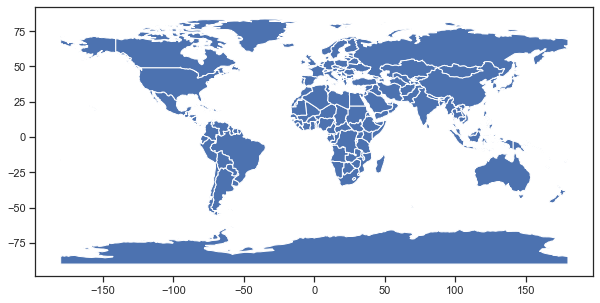

In [17]:
# Plotting the world map
geo_world.plot(figsize=(10,6))




In [18]:
# Merging the ladder score with the world dataset
geo_world_ladder = geo_world.merge(WH_ladder_countries, how = ("left"), left_on='name', right_on=('Country name'))
print("Type of Dataframe:", type(geo_world_ladder), geo_world_ladder.shape[0])
geo_world_ladder.head()
                       


Type of Dataframe: <class 'geopandas.geodataframe.GeoDataFrame'> 177


,pop_est,continent,name,iso_a3,gdp_md_est,geometry,Ladder score
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",NaN
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",3.623
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",NaN
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",7.103
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",NaN


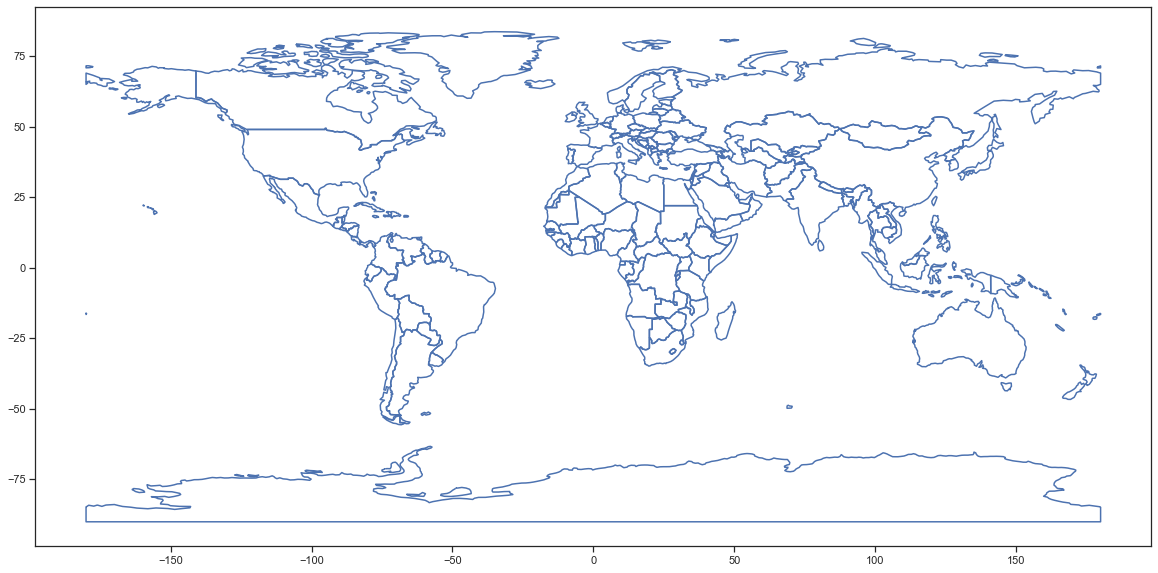

In [19]:
# Plotting the boundary on the world map
boundary_map = geo_world["geometry"].boundary.plot(figsize=(20,16))






Text(0.5, 1.0, ' National happiness ranking for the year 2021')

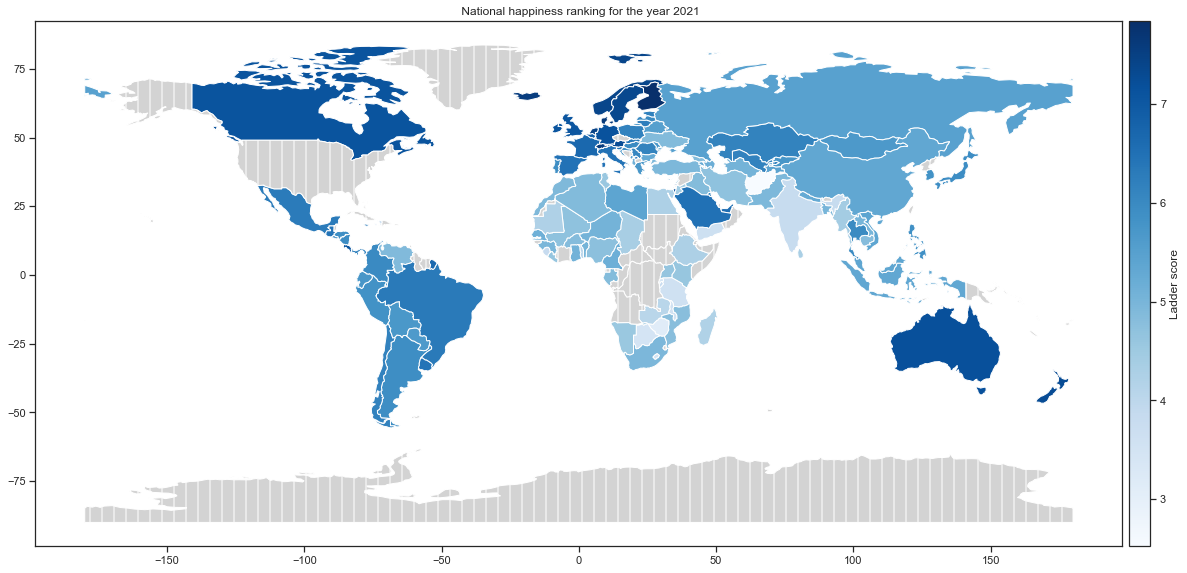

In [20]:
# Displaying a chlorpleth map using plot area
fig,ax = plt.subplots(1,1,figsize=(20,16))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right",size="2%",pad="0.5%")
geo_world_ladder.plot(column="Ladder score",ax=ax,cax=cax,cmap="Blues",legend=True,legend_kwds={"label":"Ladder score"},missing_kwds = {"color":'lightgrey',"edgecolor":"white","hatch":"|"})


ax.set_title(" National happiness ranking for the year 2021")


Text(0.5, 1.0, 'Pair plot to see if there is a relationship between the factors that may contribute to happiness')

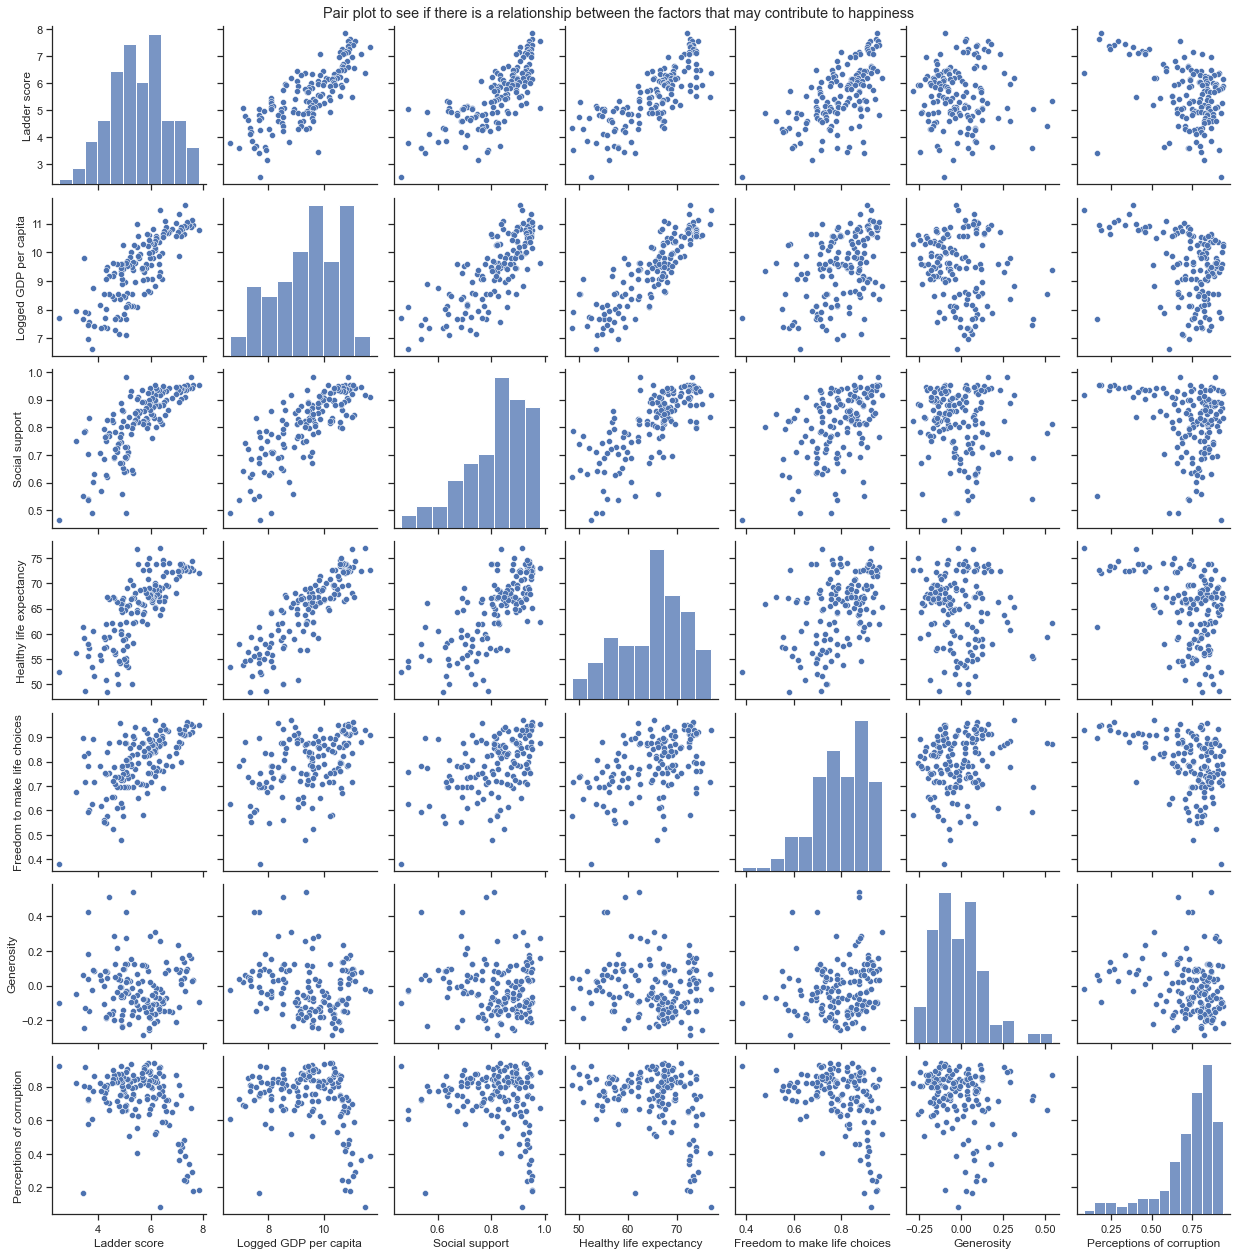

In [21]:
# Pair plot to visualise all the features at once and the relationship with each other.
sns.set(style="ticks", color_codes=True)
plt.show()
Variable_happy = sns.pairplot(World_Happiness, vars=["Ladder score","Logged GDP per capita", "Social support", "Healthy life expectancy","Freedom to make life choices","Generosity","Perceptions of corruption"])
Variable_happy.fig.suptitle("Pair plot to see if there is a relationship between the factors that may contribute to happiness", y=1.0)

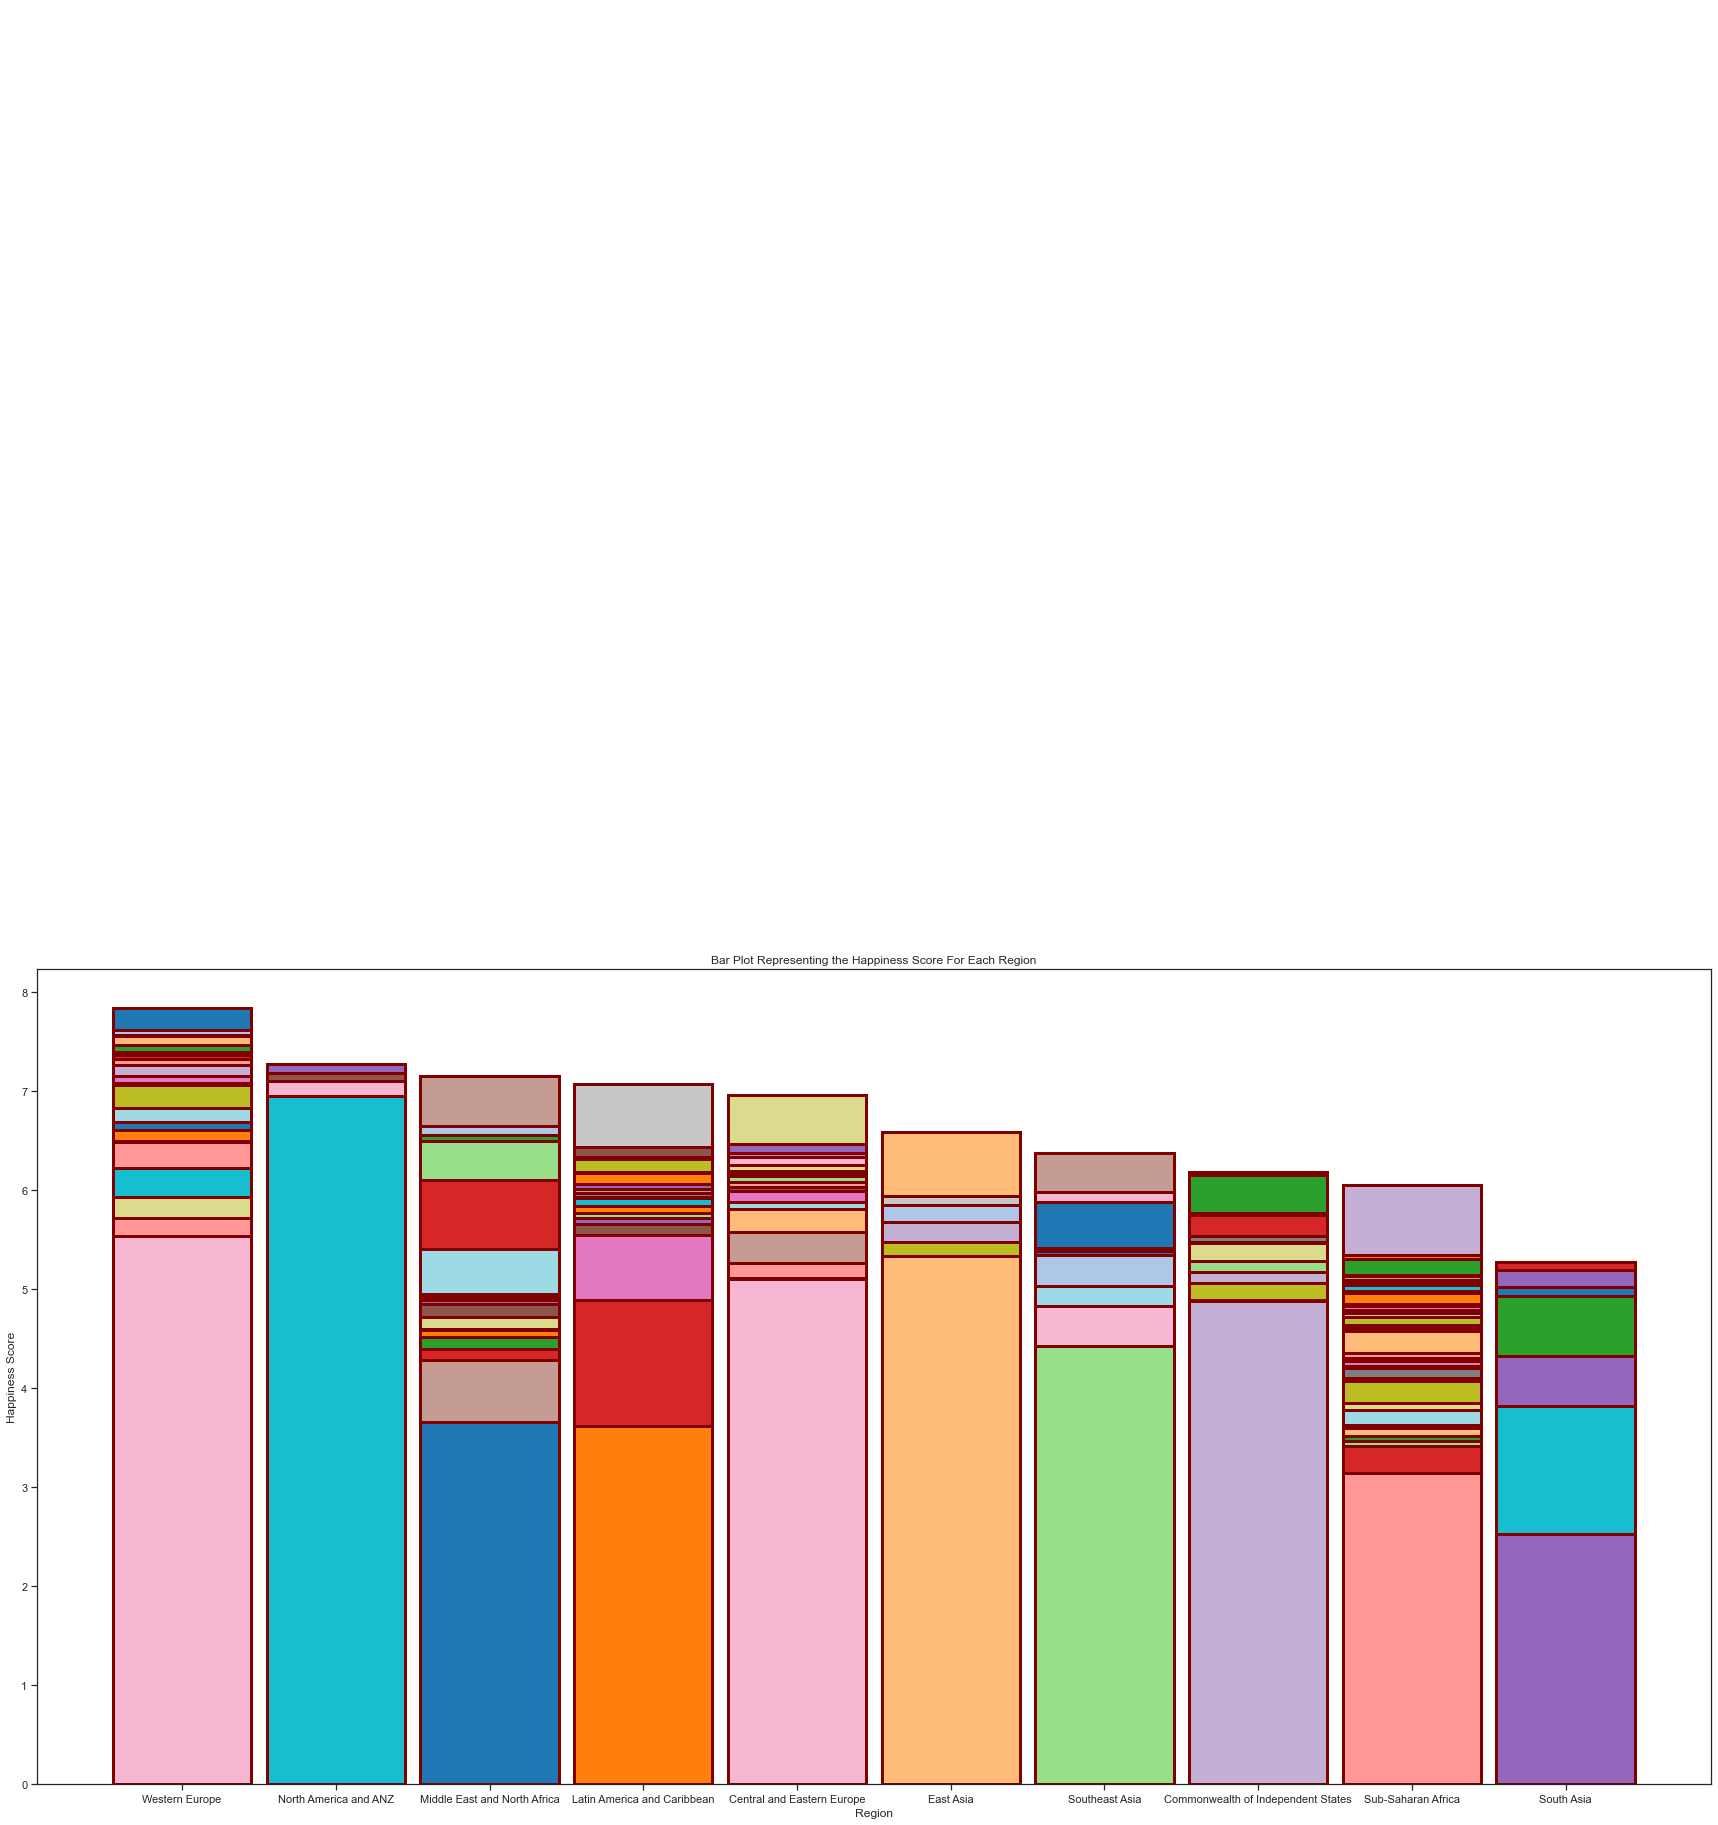

In [22]:
plt.figure(figsize = (30,15))
Region = World_Happiness['Regional indicator']
Region.head()
Happy_score = World_Happiness['Ladder score']
Happy_score.head()
col_map = plt.get_cmap('tab20')

pl = plt.bar(Region, Happy_score, width= 0.9, align='center',color=col_map.colors, edgecolor = 'maroon',linewidth=3)

for bar in pl:
    plt.annotate(bar.get_height(), 
                 xy=(bar.get_x()+0.07, bar.get_height()+10), 
                     fontsize=15)
    
plt.title("Bar Plot Representing the Happiness Score For Each Region")
plt.xlabel('Region')
plt.ylabel('Happiness Score')
plt.show()




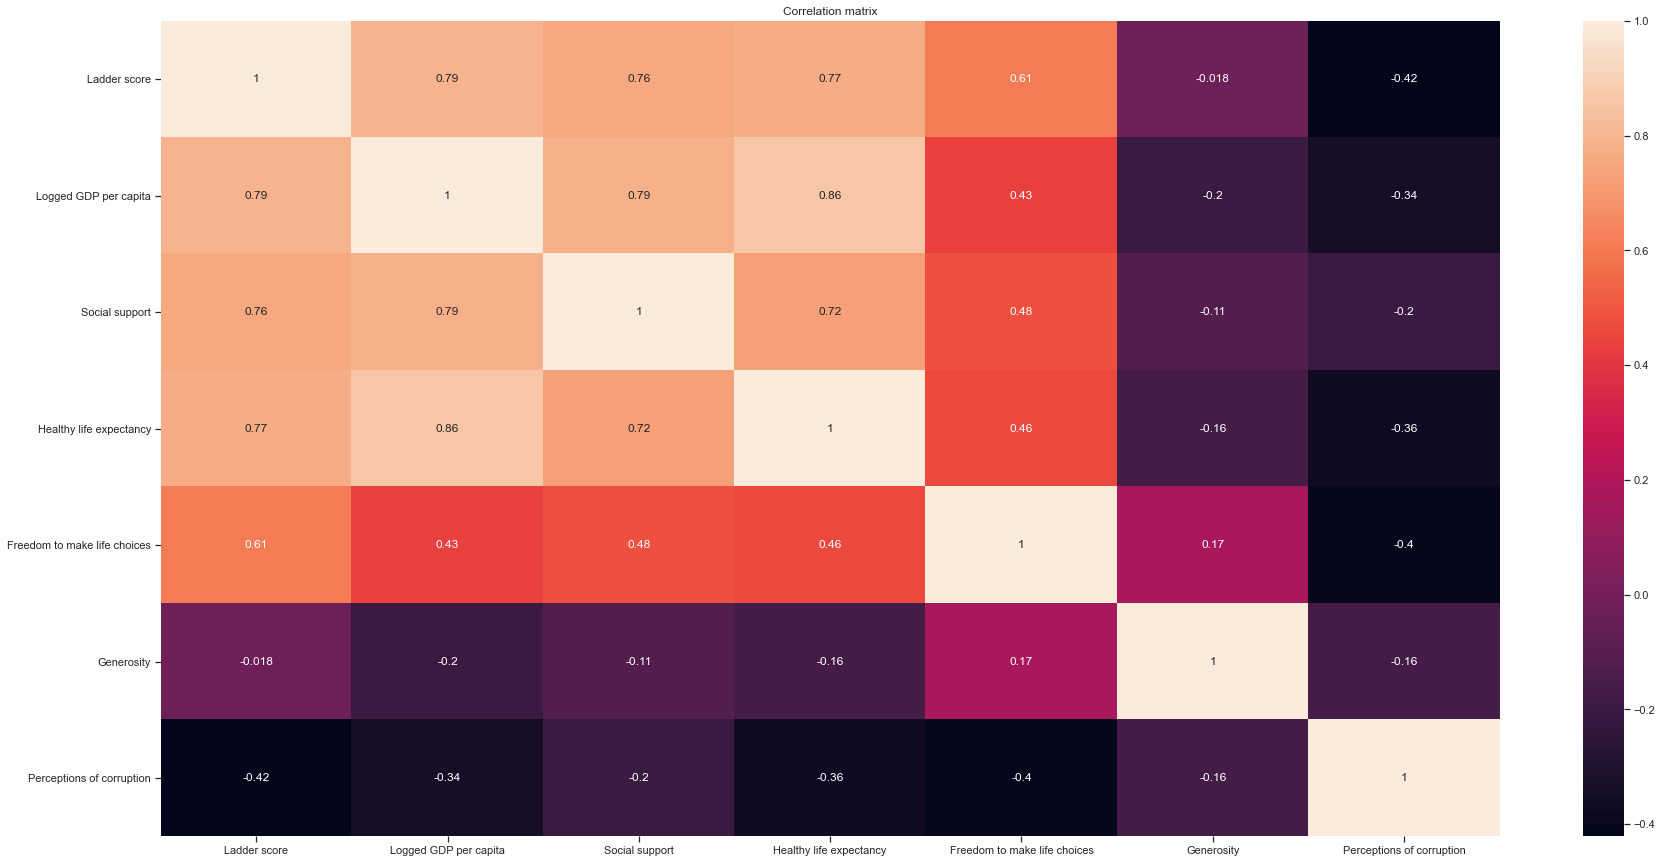

In [23]:
# Creating a final dataset that will be used for correlation matrix

WH_clustering = World_Happiness[["Ladder score","Logged GDP per capita", "Social support", "Healthy life expectancy","Freedom to make life choices","Generosity","Perceptions of corruption"]]
WH_clustering.head()
plt.figure(figsize = (30,15))
CorrelationMatrix = WH_clustering.corr()
sns.heatmap(CorrelationMatrix, annot=True)
plt.title("Correlation matrix")
plt.show()




In [24]:
# Comparing countries happiness over the years
# Importing the datasets
World_Happiness15 = pd.read_csv ('2015.csv')
World_Happiness16 = pd.read_csv ('2016.csv')
World_Happiness17 = pd.read_csv ('2017.csv')
World_Happiness18 = pd.read_csv ('2018.csv')
World_Happiness19 = pd.read_csv ('2019.csv')  
World_Happiness20 = pd.read_csv ('2020.csv')
World_Happiness = pd.read_csv ('2021.csv')

# Plot the scatter plot from 2015 to 2021
fig2021 = px.scatter(World_Happiness, x="Logged GDP per capita", y="Ladder score",title="Year 2021 country happiness", size_max=7, color="Country name", hover_name="Country name")
fig2021.show()

fig2015= px.scatter(World_Happiness15, x="Economy (GDP per Capita)", y="Happiness Rank",title="Year 2015 country happiness", size_max=7, color="Country", hover_name="Country")
fig2015.show()

fig2016= px.scatter(World_Happiness16, x="Economy (GDP per Capita)", y="Happiness Rank",title="Year 2016 country happiness", size_max=7, color="Country", hover_name="Country")
fig2016.show()

fig2017= px.scatter(World_Happiness17, x="Economy..GDP.per.Capita.", y="Happiness.Rank",title="Year 2017 country happiness", size_max=7, color="Country", hover_name="Country")
fig2017.show()

fig2018= px.scatter(World_Happiness18, x="GDP per capita", y="Score",title="Year 2018 country happiness", size_max=7, color="Country or region", hover_name="Country or region")
fig2018.show()

fig2019= px.scatter(World_Happiness19, x="GDP per capita", y="Score",title="Year 2019 country happiness", size_max=7, color="Country or region", hover_name="Country or region")
fig2019.show()

fig2020= px.scatter(World_Happiness20, x="Logged GDP per capita", y="Ladder score",title="Year 2020 country happiness", size_max=7, color="Country name", hover_name="Country name")
fig2020.show()














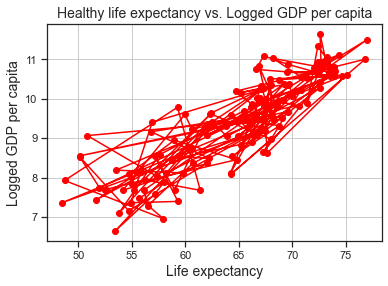

In [27]:
# Observing life expectancy and GDP


Life_expectancy = World_Happiness['Healthy life expectancy']
GDPperCapita = World_Happiness['Logged GDP per capita']

plt.plot(Life_expectancy,GDPperCapita,color='red',marker='o')
plt.title('Healthy life expectancy vs. Logged GDP per capita',fontsize=14)
plt.xlabel('Life expectancy', fontsize=14)
plt.ylabel('Logged GDP per capita', fontsize=14)
plt.grid(True)
plt.show()













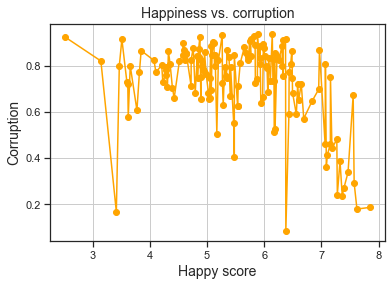

In [32]:
# Graph for perception of corruption and happiness score
Corruption = World_Happiness['Perceptions of corruption']

plt.plot(Happy_score,Corruption,color='orange',marker='o')
plt.title('Happiness vs. corruption',fontsize=14)
plt.xlabel('Happy score', fontsize=14)
plt.ylabel('Corruption', fontsize=14)
plt.grid(True)
plt.show()


In [29]:
# Linear regression

y = Happy_score # dependent variable
X = WH_clustering # independent variable

# Model initialization
regression_model = LinearRegression()
# Fit the data(train the model)
regression_model.fit(X, y)
# Predict
y_predicted = regression_model.predict(X)

rmse = mean_squared_error(y, y_predicted)
r2 = r2_score(y, y_predicted)

print('Slope:' ,regression_model.coef_)
print('Intercept:', regression_model.intercept_)
print('Root mean squared error: ', rmse)
print('R2 score: ', r2)




Slope: [ 1.00000000e+00 -2.87423482e-16  1.41895859e-16 -2.22019237e-15
  1.16950830e-16 -1.53580912e-16 -2.57525586e-16]
Intercept: 1.4210854715202004e-13
Root mean squared error:  2.0939359742763305e-28
R2 score:  1.0
